# import

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [3]:
%matplotlib inline

# path to string

In [4]:
path = r'C:\Users\leevg\OneDrive\Desktop\CF\DI\A6'

# import data

In [5]:
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'TSA Claims Task 6.2.csv'))

In [6]:
df.head()

,Unnamed: 0,Date Received,Incident Date,State,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Close Category
0,0,6/20/02,5/9/02,Maryland,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Other,Checkpoint,Clothing,75.00,Approved,75.0,Approve in Full,Medium Price
1,1,6/20/02,6/16/02,Arizona,Phoenix Sky Harbor International,Other,Property Damage,Checkpoint,Computers,2270.09,Canceled,0.0,Cancel,Low price
2,2,6/25/02,5/4/02,Georgia,Hartsfield-Jackson Atlanta International Airport,Other,Passenger Property Loss,Checkpoint,Jewelry,4457.29,Denied,0.0,Deny,Low price
3,3,7/8/02,6/12/02,Maryland,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Other,Checkpoint,Glasses & Contacts,16.71,Approved,17.0,Approve in Full,Low price
4,4,7/8/02,6/4/02,Maryland,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Other,Other,Clothing,450.00,Canceled,0.0,Cancel,Low price


In [7]:
df = df.drop(columns = 'Unnamed: 0')

In [8]:
df.head()

,Date Received,Incident Date,State,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Close Category
0,6/20/02,5/9/02,Maryland,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Other,Checkpoint,Clothing,75.00,Approved,75.0,Approve in Full,Medium Price
1,6/20/02,6/16/02,Arizona,Phoenix Sky Harbor International,Other,Property Damage,Checkpoint,Computers,2270.09,Canceled,0.0,Cancel,Low price
2,6/25/02,5/4/02,Georgia,Hartsfield-Jackson Atlanta International Airport,Other,Passenger Property Loss,Checkpoint,Jewelry,4457.29,Denied,0.0,Deny,Low price
3,7/8/02,6/12/02,Maryland,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Other,Checkpoint,Glasses & Contacts,16.71,Approved,17.0,Approve in Full,Low price
4,7/8/02,6/4/02,Maryland,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Other,Other,Clothing,450.00,Canceled,0.0,Cancel,Low price


In [9]:
df.shape

(139201, 13)

In [10]:
df_numerical = df.drop(columns = ['Date Received', 'Incident Date', 'State', 'Airport Name', 'Airline Name', 'Claim Type', 'Claim Site', 'Item', 'Status', 'Disposition', 'Close Category'])

In [11]:
df_numerical.head()

,Claim Amount,Close Amount
0,75.00,75.0
1,2270.09,0.0
2,4457.29,0.0
3,16.71,17.0
4,450.00,0.0


# Elbow Technique

In [12]:
# define range 

num_cl = range(1, 10)

In [13]:
# define kmeans cluster

kmeans = [KMeans(n_clusters = i) for i in num_cl]

In [14]:
# create a score that represents rate of variation for the clusters

score = [kmeans[i].fit(df_numerical).score(df_numerical) for i in range(len(kmeans))]

score

[-2.6163566809012612e+16,
 -851921247536584.2,
 -451961996624645.94,
 -139461996624577.48,
 -40205092920113.32,
 -9513079556937.037,
 -4462954419997.177,
 -2663218144548.4575,
 -2033009811215.4275]

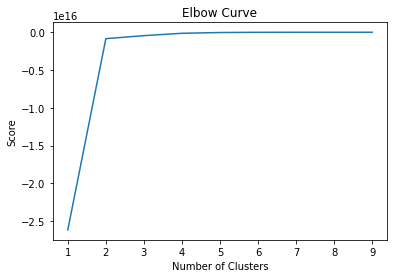

In [15]:
# plot the elbow curve

pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# There is a steep slope from 1 to 2, which immediately tapers off. This means 2 clusters is optimal.

# KMeans cluster

In [16]:
# create KMeans object

kmeans = KMeans(n_clusters = 2, n_jobs = -1)

In [17]:
# fit KMeans object to the data

kmeans.fit(df_numerical)

C:\Users\leevg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=2, n_jobs=-1)

In [18]:
df_numerical['clusters'] = kmeans.fit_predict(df_numerical)

C:\Users\leevg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [19]:
df_numerical.head()

,Claim Amount,Close Amount,clusters
0,75.00,75.0,0
1,2270.09,0.0,0
2,4457.29,0.0,0
3,16.71,17.0,0
4,450.00,0.0,0


In [20]:
df_numerical['clusters'].value_counts()

0    139199
1         2
Name: clusters, dtype: int64

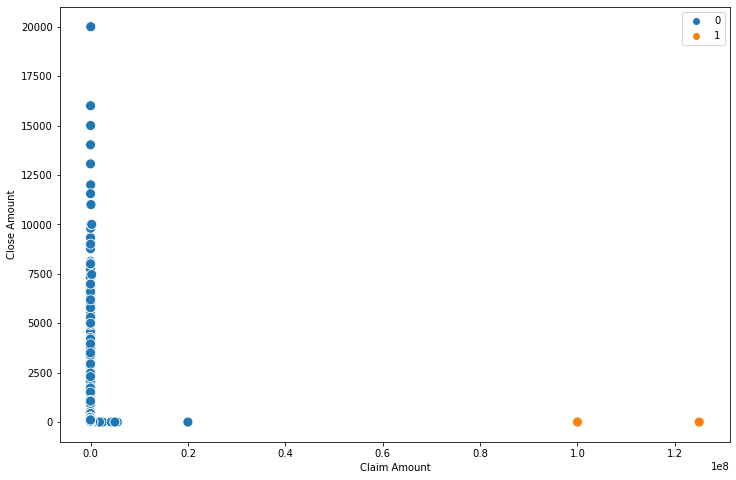

In [21]:
# plot clusters

plt.figure(figsize = (12, 8))
ax = sns.scatterplot(x = df_numerical['Claim Amount'], y = df_numerical['Close Amount'], hue = kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Claim Amount')
plt.ylabel('Close Amount')
plt.show()

In [22]:
# descriptive statistics

df_numerical.loc[df_numerical['clusters'] == 2, 'cluster'] = 'dark purple'
df_numerical.loc[df_numerical['clusters'] == 1, 'cluster'] = 'purple'
df_numerical.loc[df_numerical['clusters'] == 0, 'cluster'] = 'pink'

In [23]:
df_numerical.groupby('cluster').agg({'Claim Amount':['mean', 'median'], 'Close Amount':['mean', 'median']})

Claim Amount              Close Amount       
                 mean       median         mean median
cluster                                               
pink     1.090589e+03        159.0    91.395176   7.75
purple   1.125000e+08  112500000.0     0.000000   0.00

# The k-means algorithm further shows there is no relationship between the two variables